<a href="https://colab.research.google.com/github/2ammidnight/Gesture-controlled-virtual-mouse-/blob/main/Stock_market_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03 00:00:00+00:00,16.532528,16.573130,16.641375,16.248346,16.262545,147611217
1,2012-01-04 00:00:00+00:00,16.603836,16.644611,16.693678,16.453827,16.563665,114989399
2,2012-01-05 00:00:00+00:00,16.373516,16.413727,16.537264,16.344486,16.491436,131808205
3,2012-01-06 00:00:00+00:00,16.150156,16.189817,16.438385,16.184088,16.417213,108119746
4,2012-01-09 00:00:00+00:00,15.465409,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14 00:00:00+00:00,95.076508,95.309998,97.220001,93.940002,95.540001,26452900
2757,2022-12-15 00:00:00+00:00,90.976578,91.199997,94.029999,90.430000,93.540001,28298800
2758,2022-12-16 00:00:00+00:00,90.637405,90.860001,91.750000,90.010002,91.199997,48485500


In [ ]:
ma_100_days  = data.Close.rolling(100).mean()

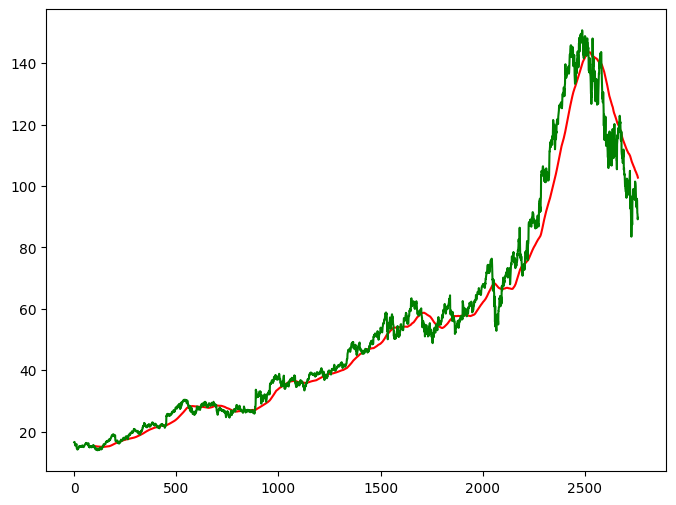

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
ma_200_days  = data.Close.rolling(200).mean()

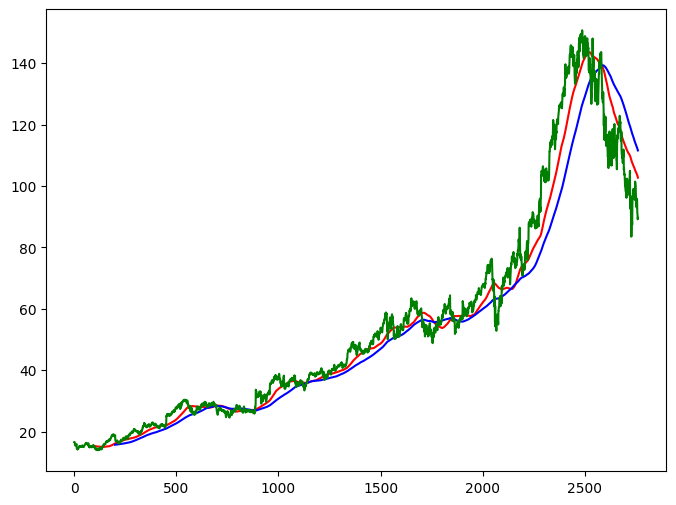

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()



In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame (data.Close[int(len(data)*80):len(data)])

In [ ]:
data_train.shape[0]

NameError: name 'data_train' is not defined

In [ ]:
data_test.shape[0]

0

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale =scaler.fit_transform(data_train)

In [ ]:
x=[]
y=[]

for i in range(100,data_train.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu',return_sequences=True,input_shape=(x.shape[1],1))) # Changed input_shape to a tuple
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu' ,return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units =80, activation='relu' , return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x,y, epochs=50, batch_size =32, verbose =1)
Epoches =50



Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 317ms/step - loss: 0.0797
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step - loss: 0.0068
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 323ms/step - loss: 0.0063
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - loss: 0.0058
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - loss: 0.0058
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 282ms/step - loss: 0.0049
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 310ms/step - loss: 0.0058
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 274ms/step - loss: 0.0039
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 276ms/step - loss: 0.0043
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 282ms/step - loss: 0.0042
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 298ms/step - loss: 0.0040
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 272ms/step - loss: 0.0036
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 299ms/step - loss: 0.0036
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 273ms/step - loss: 0.0041
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale = scaler.fit_transform(data_test)

In [ ]:
import numpy as np

x = []
y = []

for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i, 0])

# Convert x and y to NumPy arrays after the loop
x, y = np.array(x), np.array(y)


In [ ]:
y_predict = model.predict(x)

66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step


In [ ]:
1/scaler.scale_
# Assuming you used a scaler like StandardScaler or MinMaxScaler previously
scale_ = 1/scaler.scale_ # Calculate and assign the inverse scaling factor to 'scale_'

y_predict = y_predict * scale_ # Now scale_ is defined and can be used

In [ ]:
y =y*scale_

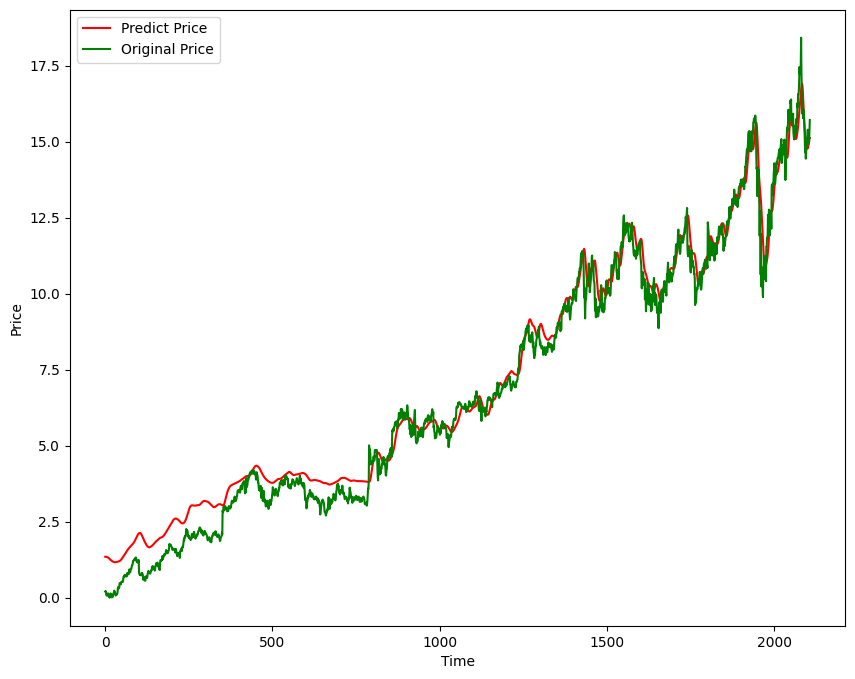

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r' , label ='Predict Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
model.save('Stock Prediction Model.keras')